In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
ayladata = pd.read_csv("ai4i2020.csv") # Membaca file CSV "ai4i2020.csv" dan menyimpannya ke dalam DataFrame 'data'
ayladata

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [3]:
# Cek Data statistik bank loan

ayladata.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
# Cek Nilai Null atau tidak Valid dari dataset Bank Loan

ayladata.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

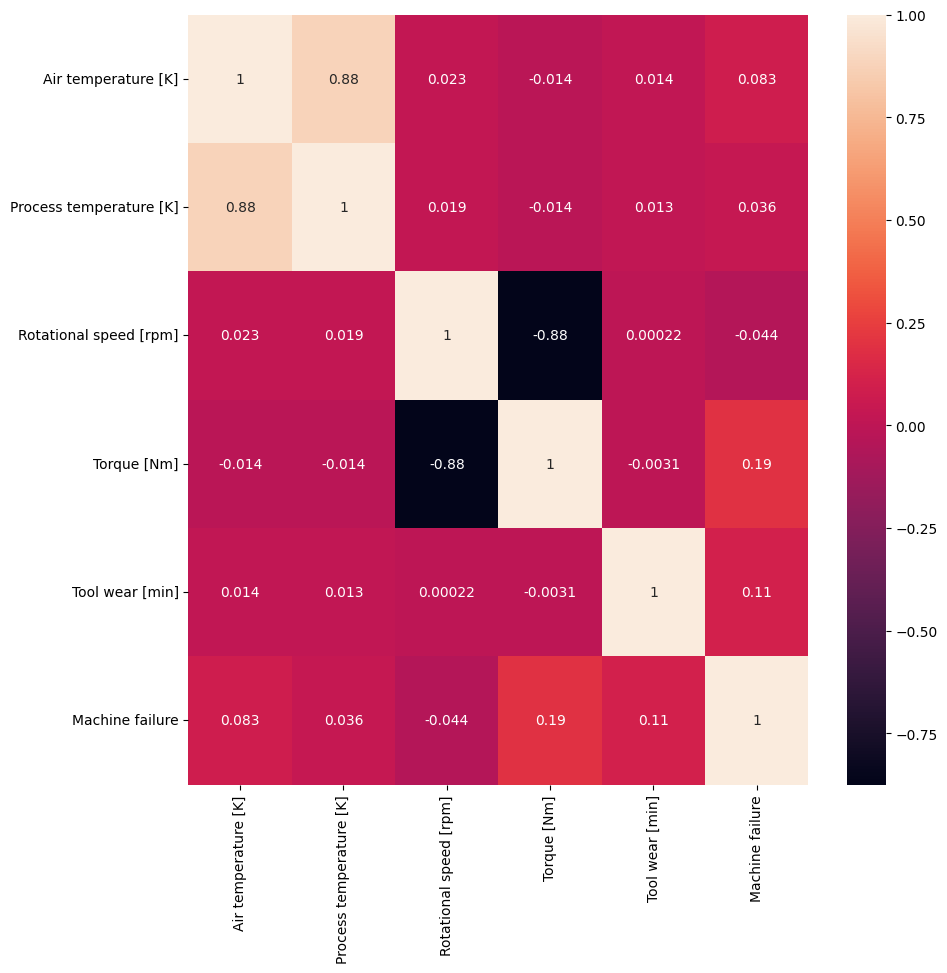

In [5]:
# create correlation matrix from the data
corr_matrix = ayladata[["Air temperature [K]", "Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]", "Machine failure"]].corr()
# visualize the correlation matrix using seaborn with dpecified fig size
fig, ax = plt.subplots(figsize=(10,10)) # Membuat subplot dengan ukuran gambar 10x10 inci
sns.heatmap(corr_matrix, annot=True) # Menggambar heatmap untuk matrix korelasi dengan tanda anotasi diaktifkan
plt.show() # Menampilkan plot heatmap

In [6]:
aylatarget = ayladata["Machine failure"].to_numpy() # Memilih kolom "Machine failure" sebagai target dan mengonversinya menjadi array numpy
# Memilih kolom-kolom lain sebagai fitur (features) dan menghapus kolom "Machine failure", lalu mengonversi ke dalam array numpy
aylafeature = ayladata[["Air temperature [K]", "Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]", "Machine failure"]].copy().drop(["Machine failure"], axis=1).to_numpy()

In [7]:
aylafeature_train, aylafeature_test, aylatarget_train, aylatarget_test = train_test_split(aylafeature, aylatarget, test_size=0.3, random_state=1234)

In [8]:
logistic_regressor = LogisticRegression(solver='liblinear',max_iter=200)
logistic_regressor.fit(aylafeature_train, aylatarget_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [9]:
aylatest_pred = logistic_regressor.predict(aylafeature_test)

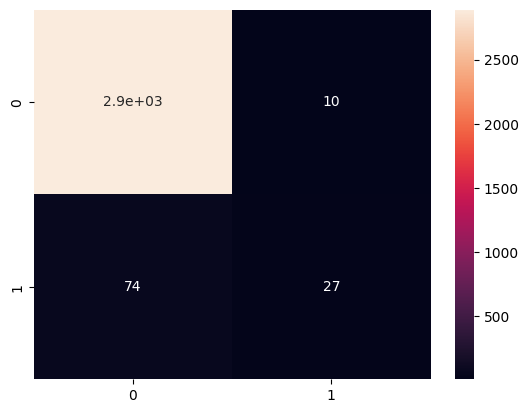

In [10]:
conf_mat = metrics.confusion_matrix(aylatarget_test, aylatest_pred)
# visualize the conf_mat using sns
sns.heatmap(conf_mat, annot=True)
plt.show()

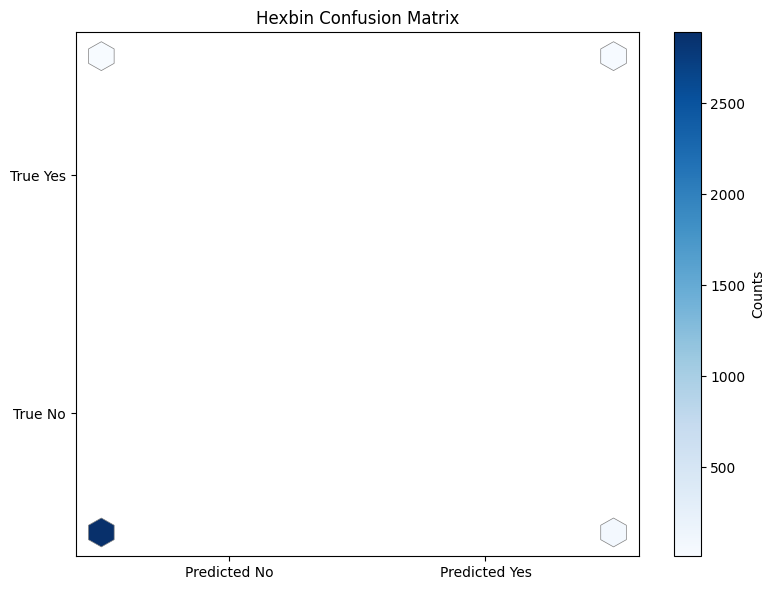

Accuracy  : 0.97
Precision : 0.73
Recall    : 0.27


In [11]:

feature_columns = ["Air temperature [K]", "Process temperature [K]",
                   "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
aylafeatures = ayladata[feature_columns].to_numpy()

# Visualisasi confusion matrix menggunakan hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(x=np.repeat([0, 1], 2),
           y=np.tile([0, 1], 2),
           C=conf_mat.flatten(),
           gridsize=20,
           cmap='Blues',
           edgecolors='grey',
           linewidths=0.5)

plt.colorbar(label='Counts')  # Menambahkan colorbar sebagai label untuk jumlah data
plt.xticks([0.25, 0.75], ['Predicted No', 'Predicted Yes'])
plt.yticks([0.25, 0.75], ['True No', 'True Yes'])
plt.title('Hexbin Confusion Matrix')
plt.tight_layout()
plt.show()

# Menghitung metrik evaluasi model
accuracy = metrics.accuracy_score(aylatarget_test, aylatest_pred)
precision = metrics.precision_score(aylatarget_test, aylatest_pred)
recall = metrics.recall_score(aylatarget_test, aylatest_pred)

# Menampilkan hasil metrik evaluasi
print('Accuracy  : {:.2f}'.format(accuracy))
print('Precision : {:.2f}'.format(precision))
print('Recall    : {:.2f}'.format(recall))


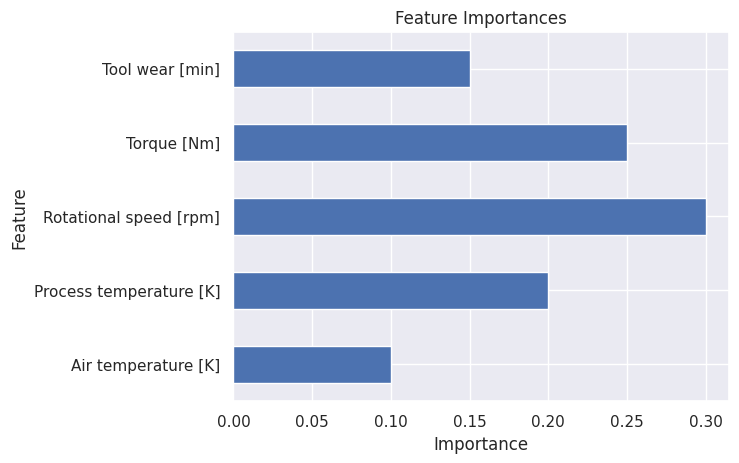

In [12]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'feature_importances' is a dictionary or Series containing feature importances
aylafeature_importances = {'Air temperature [K]': 0.1, 'Process temperature [K]': 0.2,
                       'Rotational speed [rpm]': 0.3, 'Torque [Nm]': 0.25,
                       'Tool wear [min]': 0.15}

# Convert feature importances to a Pandas Series for easier handling and plotting
aylafeature_importances_series = pd.Series(aylafeature_importances)

# Set Seaborn theme for aesthetics
sns.set_theme()

# Plot feature importances as a horizontal bar chart
aylafeature_importances_series.plot(kind="barh")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [13]:
# Hitung accuracy
accuracy = (conf_mat[0,0] + conf_mat[1,1]) / np.sum(conf_mat)

# Hitung sensitivity (true positive rate)
sensitivity = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

# Hitung specificity (true negative rate)
specificity = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])

# Hitung precision
precision = conf_mat[1,1] / (conf_mat[0,1] + conf_mat[1,1])

# Menampilkan hasil
print('Accuracy    = {}'.format(np.round(accuracy, 3))) #Accuracy mengukur seberapa akurat model dalam memprediksi kelas secara keseluruhan
print('Sensitivity = {}'.format(np.round(sensitivity, 3))) #Sensitivity mengukur seberapa baik model dalam mengidentifikasi kelas positif (dalam kasus ini, kelas 1) di antara semua kasus yang sebenarnya positif
print('Specificity = {}'.format(np.round(specificity, 3))) #Specificity mengukur seberapa baik model dalam mengidentifikasi kelas negatif (dalam kasus ini, kelas 0) di antara semua kasus yang sebenarnya negatif
print('Precision   = {}'.format(np.round(precision, 3))) #Precision mengukur seberapa banyak prediksi positif yang sebenarnya benar (dari semua prediksi positif)


Accuracy    = 0.972
Sensitivity = 0.267
Specificity = 0.997
Precision   = 0.73
